In [1]:
import ta
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

Bollinger Bands are a type of statistical chart characterizing the prices and volatility of an asset over time.

1. A middle band being an N-period simple moving average (SMA(N))
2. An upper band at KK times an NN-period standard deviation above the middle band. SMA(N)+(K×standard deviation(N))
3. A lower band at KK times an NN-period standard deviation below the middle band. SMA(N)−(K×standard deviation(N))


The width of the bands indicates the asset’s volatility. Narrow bands suggest low volatility, while wide bands suggest high volatility.


*Touching the Upper Band:

- This can be an indication that the asset is overbought.
- However, simply touching or exceeding the upper band is not, by itself, a sell signal. Some traders believe that a close outside of the bands is more significant.
- In a strong uptrend, prices can walk the upper band and remain overbought for an extended period.

*Touching the Lower Band:

- This can suggest the asset is oversold.
- As with the upper band, a touch or break below the lower band isn’t always a buy signal. Prices can walk the lower band in a strong downtrend.
- A more reliable buy signal might be when the price moves back inside the Bollinger Bands after a brief excursion below.

*Bollinger Band Squeeze:

- A squeeze denotes a period of low volatility and is considered by traders to be a potential indicator of future increased volatility and possible trading opportunities.
- The end of a squeeze, marked by the bands moving further apart, can be a signal of the start of a new trend. The direction in which the bands expand can often be the direction of the forthcoming trend.

*Bollinger Bounce:

- The price tends to return to the middle of the Bollinger Bands. This can be used as a type of mean-reversion strategy.
- When the price bounces off the lower band and heads toward the middle band, it can be interpreted as a potential buy signal.
- Conversely, when it drops from the upper band towards the middle band, it can be seen as a potential sell signal.

*Double Bottoms and Double Tops:

- A double bottom is a bullish reversal pattern where the price forms two lows roughly at the same level. If the second low breaks below the Bollinger Bands but then close back inside, it can signal a potential bullish reversal.
- Conversely, a double top is a bearish reversal pattern. If the price forms two peaks at about the same level, and the second peak is above the upper Bollinger Band but then closes back inside, it can be a potential bearish reversal signal.


It’s crucial to understand that while Bollinger Bands can give these potential signals, no single tool should be used in isolation. Combining Bollinger Bands with other technical analysis tools, like RSI (Relative Strength Index), MACD, or support and resistance levels, can provide more robust signals.

In [2]:
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=700)).strftime('%Y-%m-%d')

data = yf.download('V', start=start_date, end=end_date, interval='1h')

[*********************100%***********************]  1 of 1 completed


In [3]:
display(data.head(3))
display(data.tail(3))

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-07-27 09:30:00-04:00,210.770004,216.850006,209.429993,215.659897,215.659897,2624782
2022-07-27 10:30:00-04:00,215.660004,215.679993,214.220001,214.875000,214.875000,998512
2022-07-27 11:30:00-04:00,214.875000,215.279999,213.440002,213.839996,213.839996,713467


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-06-25 13:30:00-04:00,274.790009,275.390015,274.369995,275.360107,275.360107,733492
2024-06-25 14:30:00-04:00,275.390015,275.410004,274.765015,274.850006,274.850006,800333
2024-06-25 15:30:00-04:00,274.859985,274.940002,273.529999,273.529999,273.529999,1570433


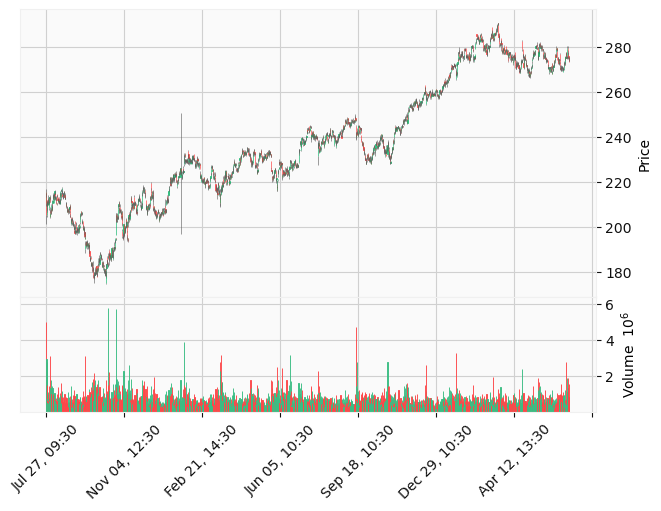

In [4]:
mpf.plot(data, type='candle', volume=True, style='yahoo')

In [5]:
indicator_bb = ta.volatility.BollingerBands(close=data['Close'], 
                                            window=20, window_dev=2)
data['bb_bbm'] = indicator_bb.bollinger_mavg()   # Middle Band
data['bb_bbh'] = indicator_bb.bollinger_hband()  # Upper Band
data['bb_bbl'] = indicator_bb.bollinger_lband()  # Lower Band
data.tail()

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl
Datetime,,,,,,,,,
2024-06-25 11:30:00-04:00,274.970001,275.200012,273.951202,274.114990,274.114990,761305,276.725349,280.088109,273.362590
2024-06-25 12:30:00-04:00,274.119995,275.540009,273.690002,274.739990,274.739990,807069,276.565099,279.985077,273.145121
2024-06-25 13:30:00-04:00,274.790009,275.390015,274.369995,275.360107,275.360107,733492,276.497104,279.955913,273.038295
2024-06-25 14:30:00-04:00,275.390015,275.410004,274.765015,274.850006,274.850006,800333,276.397104,279.924289,272.869919
2024-06-25 15:30:00-04:00,274.859985,274.940002,273.529999,273.529999,273.529999,1570433,276.275154,280.015335,272.534973


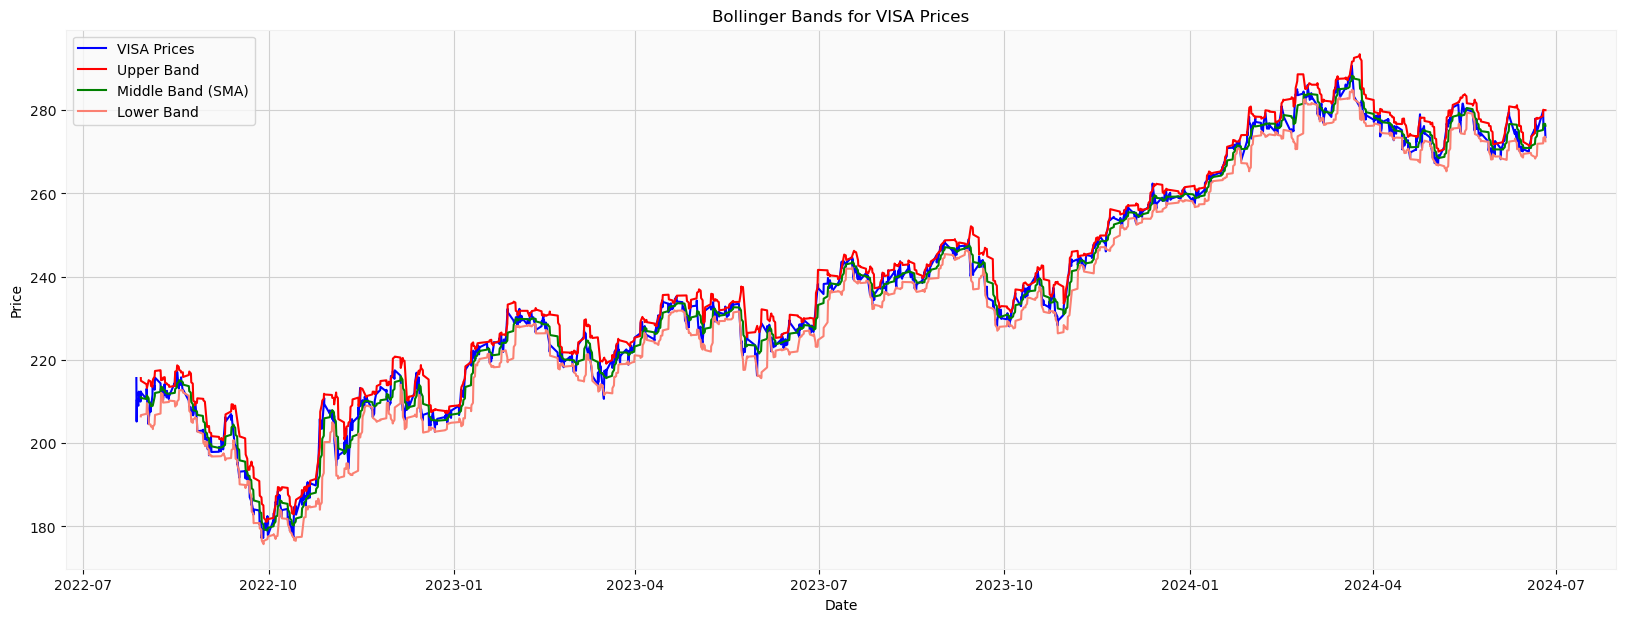

In [6]:
plt.figure(figsize=(20,7))
plt.plot(data['Close'], label='VISA Prices', color='blue')
plt.plot(data['bb_bbh'], label='Upper Band', color='red')
plt.plot(data['bb_bbm'], label='Middle Band (SMA)', color='green')
plt.plot(data['bb_bbl'], label='Lower Band', color='salmon')
plt.title('Bollinger Bands for VISA Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()